<a href="https://colab.research.google.com/github/Muralikrishna019/Machine-Learning-Lab/blob/main/Bivariate_Analysis(AP23110010656).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", palette="pastel")
%matplotlib inline

Load Dataset

In [ ]:
df = pd.read_csv('movies.csv')
df.head()

,Unnamed: 0,id,title,overview,release_date,popularity,vote_average,vote_count
0,0,278,The Shawshank Redemption,Imprisoned in the 1940s for the double murder ...,1994-09-23,26.9579,8.712,28675
1,1,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,26.5804,8.686,21701
2,2,240,The Godfather Part II,In the continuing saga of the Corleone crime f...,1974-12-20,15.6559,8.571,13099
3,3,424,Schindler's List,The true story of how businessman Oskar Schind...,1993-12-15,12.5642,8.565,16616
4,4,389,12 Angry Men,The defense and the prosecution have rested an...,1957-04-10,14.6028,8.549,9307


In [ ]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8560 entries, 0 to 8559
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    8560 non-null   int64  
 1   id            8560 non-null   int64  
 2   title         8560 non-null   object 
 3   overview      8559 non-null   object 
 4   release_date  8558 non-null   object 
 5   popularity    8560 non-null   float64
 6   vote_average  8560 non-null   float64
 7   vote_count    8560 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 535.1+ KB
None


Data Cleaning

In [ ]:
df = df.drop(columns=['Unnamed: 0', 'id'], errors='ignore')
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year
print("\nMissing values before cleaning:\n", df.isna().sum())
df = df.dropna(subset=['title', 'release_date', 'vote_average', 'vote_count'])
print("\nMissing values after cleaning:\n", df.isna().sum())


Missing values before cleaning:
 title           0
overview        1
release_date    2
popularity      0
vote_average    0
vote_count      0
release_year    2
dtype: int64

Missing values after cleaning:
 title           0
overview        1
release_date    0
popularity      0
vote_average    0
vote_count      0
release_year    0
dtype: int64


Popularity vs Average Rating

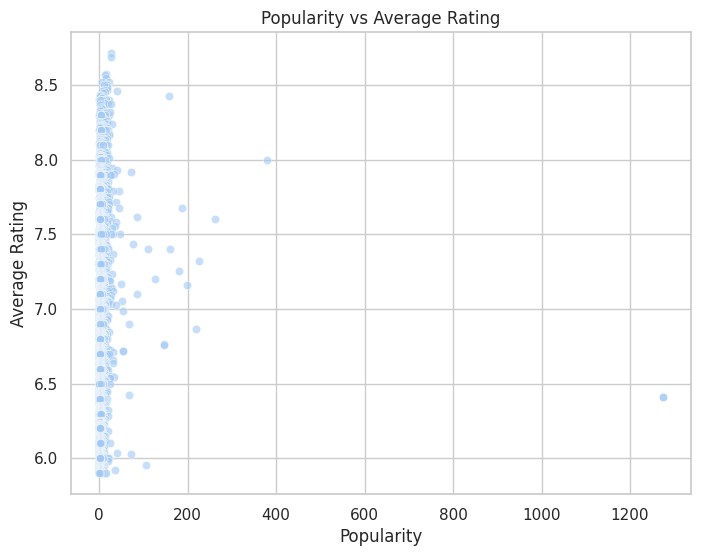

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='popularity', y='vote_average', alpha=0.6)
plt.title("Popularity vs Average Rating")
plt.xlabel("Popularity")
plt.ylabel("Average Rating")
plt.show()

Popularity vs Vote Count

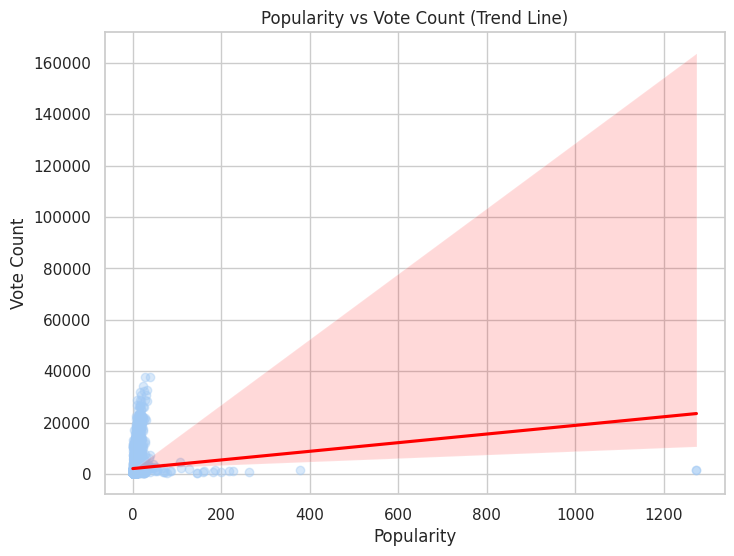

In [ ]:
plt.figure(figsize=(8,6))
sns.regplot(data=df, x='popularity', y='vote_count', scatter_kws={'alpha':0.4}, line_kws={'color':'red'})
plt.title("Popularity vs Vote Count (Trend Line)")
plt.xlabel("Popularity")
plt.ylabel("Vote Count")
plt.show()

Average Rating vs Vote Count

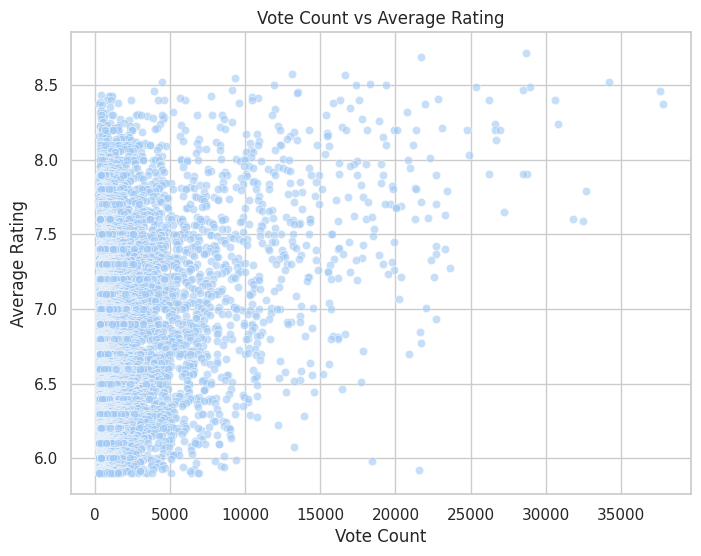

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='vote_count', y='vote_average', alpha=0.6)
plt.title("Vote Count vs Average Rating")
plt.xlabel("Vote Count")
plt.ylabel("Average Rating")
plt.show()

Average Rating by Release Year

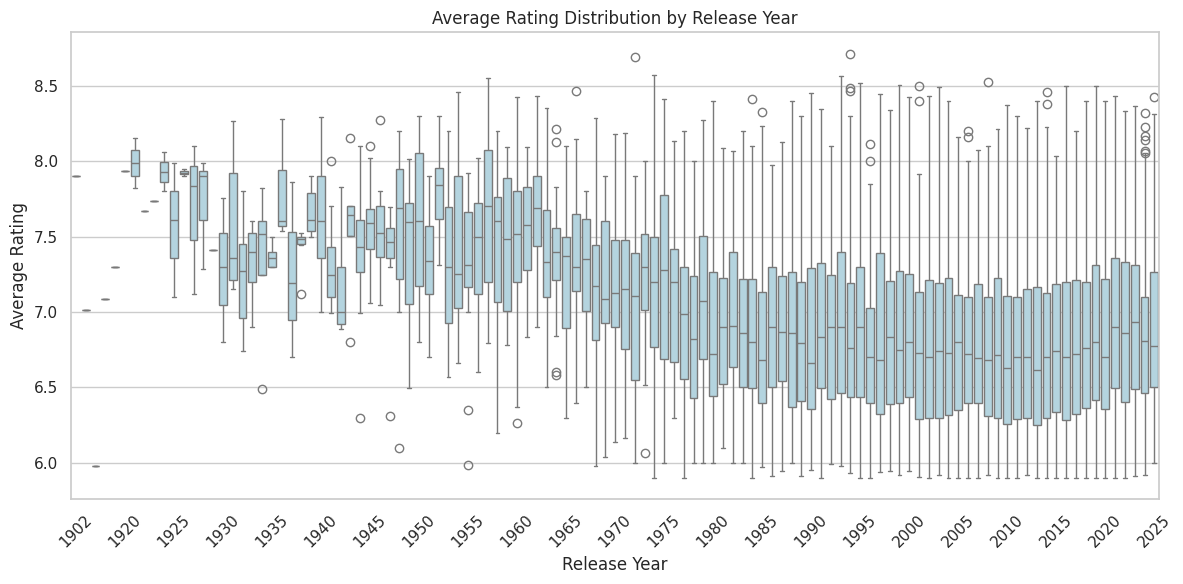

In [ ]:
df['release_year'] = df['release_year'].astype(int)
df = df.sort_values('release_year')
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='release_year', y='vote_average', color='lightblue')
plt.title("Average Rating Distribution by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Average Rating")
years = sorted(df['release_year'].unique())
plt.xticks(ticks=range(0, len(years), 5), labels=years[::5], rotation=45)
plt.tight_layout()
plt.show()


Popularity Trend by Release Year

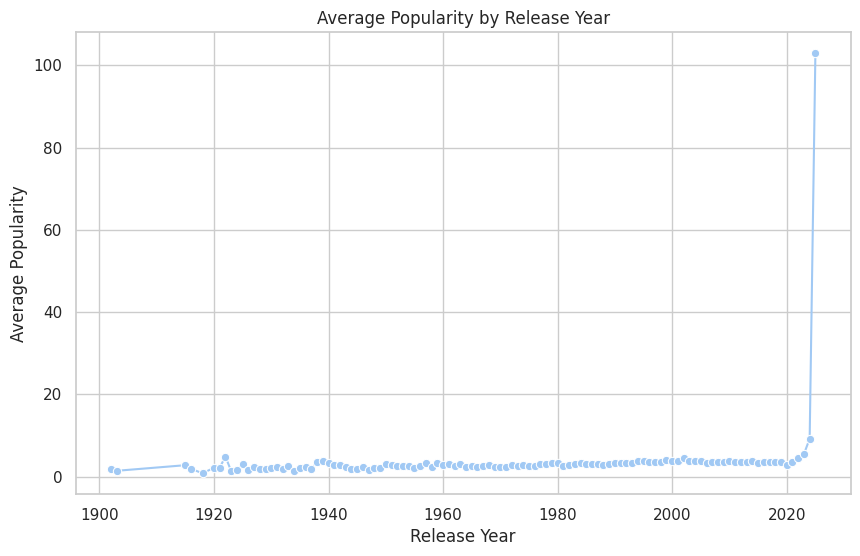

In [ ]:
yearly_trend = df.groupby('release_year')['popularity'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.lineplot(data=yearly_trend, x='release_year', y='popularity', marker='o')
plt.title("Average Popularity by Release Year")
plt.xlabel("Release Year")
plt.ylabel("Average Popularity")
plt.show()

Correlation Heatmap

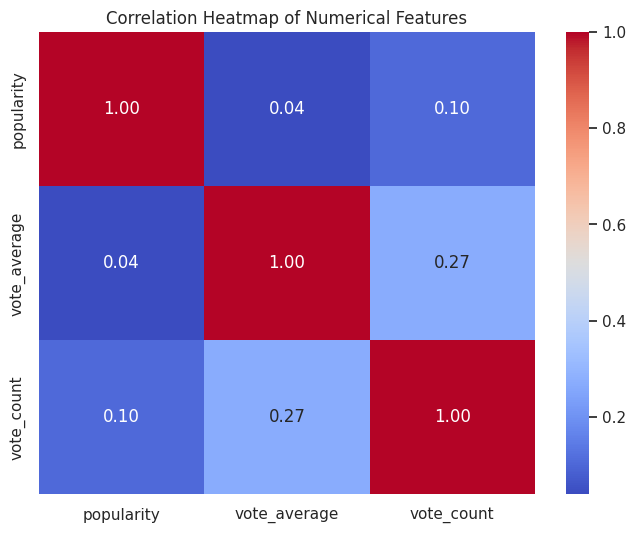

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['popularity','vote_average','vote_count']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()